# Определение перспективного тарифа для телеком-компании.

Компания «Мегалайн» — федерального оператора сотовой связи предлагают клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке (500 пользователей за 2018 год) клиентов. 

Описание тарифов
Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
o	минута разговора: 3 рубля
o	сообщение: 3 рубля
o	1 Гб интернет-трафика: 200 рублей
Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
o	минута разговора: 1 рубль
o	сообщение: 1 рубль
o	1 Гб интернет-трафика: 150 рублей
Примечание
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

**Цель исследования** — проверим гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Определим поведение клиентов оператора, длительность разговоров, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. А также проанализируем поведение клиентов с целью: определить какой тариф лучше.
Исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Дополнительные расчеты и внесение результатов в таблицу.
 4. Исследовательский анализ данных.
 5. Проверка гипотез.


## Изучение данных из файла

In [1]:
#загрузка библиотек
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
#чтение данных
users = pd.read_csv(r'C:\Users\Olga\Desktop\prog\users.csv')
calls = pd.read_csv(r'C:\Users\Olga\Desktop\prog\calls.csv')
messages = pd.read_csv(r'C:\Users\Olga\Desktop\prog\messages.csv')
internet = pd.read_csv(r'C:\Users\Olga\Desktop\prog\internet.csv',index_col=0)
tariffs = pd.read_csv(r'C:\Users\Olga\Desktop\prog\tariffs.csv')

In [3]:
#просмотр данных и основных коэффициентов
df_list = [users,calls,messages,internet,tariffs]
for df in df_list:
    display(df.info())
    display(df.head(10))
    display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


In [4]:
#проверим на дубликаты
for df in df_list:
    print(df.duplicated().sum())

0
0
0
0
0


### Вывод
Описание данных

Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблицы разного размера. Во всех столбцах с датами нужно изменить тип данных. Пропусков в данных нет, кроме столбца "churn_date", но это указано в документации, оставляем столбец как есть.Нужно округлить время звонков и трафика в большую сторону,по условиям тарифов.

## Предобработка данных

In [5]:
# изменим тип данных на дату
def type_datetime(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
        
type_datetime(calls, ['call_date'])
type_datetime(users, ['reg_date', 'churn_date'])
type_datetime(messages, ['message_date'])
type_datetime(internet, ['session_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [6]:
#округлим числа и заполним пропуски
calls['duration'] = np.ceil(calls['duration'])  
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['mb_used'] = internet['mb_used'].astype('int64')
calls['duration'] = calls['duration'].astype('int64')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [7]:
#в таблице с интернет-трафиком переведем мб в гб
internet['gb_used'] = (internet['mb_used'] / 1024)
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   gb_used       149396 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 6.8+ MB


### Вывод
Изменили тип данных в столбцах с датами. Столбец 'Unnamed: 0' удалили, т.к. он дублировал индексы. Округлили израсходаванные смс,звонки и трафик, также перевели значение в гигабайты, согласно документации. 

## Расчёты и добавление результатов в таблицу

Рассмотрим данные по каждому пользователю, рассчитав:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

Для этого создадим столбец month в каждой таблице.

In [8]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
calls.sample(5)

,id,call_date,duration,user_id,month
11738,1030_271,2018-11-02,0,1030,11
71671,1178_431,2018-09-22,2,1178,9
200474,1494_136,2018-08-17,15,1494,8
130249,1333_96,2018-12-01,5,1333,12
87820,1219_589,2018-03-25,16,1219,3


In [9]:
#fереименуем столбец tariff_name,для дальнейшего объединения таблиц
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [10]:
#сделаем pivot для трех таблиц. сгруппируем по user_id и month:
calls_group = calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':'count', 'duration':sum}) 
calls_group.columns = ['calls_count', 'calls_duration']

messages_group = messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'})
messages_group.columns = ['messages_count']

internet_group = internet.pivot_table(index=['user_id', 'month'], aggfunc={'gb_used':sum})
internet_group.columns = ['traffic_volume_gb']
#округлим объём потраченного за сессию интернет-трафика (в гигабайтах)
internet_group['traffic_volume_gb']= internet_group['traffic_volume_gb'].apply(np.ceil)
internet_group.head()

traffic_volume_gb
user_id month                   
1000    5                    3.0
        6                   23.0
        7                   14.0
        8                   14.0
        9                   15.0

Чтобы рассчитать помесячную выручку объеденим таблицы.

In [11]:
data = internet_group.join([calls_group, messages_group], how='outer').reset_index(level='month')
data.head(15)

,month,traffic_volume_gb,calls_count,calls_duration,messages_count
user_id,,,,,
1000,5,3.0,22.0,159.0,22.0
1000,6,23.0,43.0,172.0,60.0
1000,7,14.0,47.0,340.0,75.0
1000,8,14.0,52.0,408.0,81.0
1000,9,15.0,58.0,466.0,57.0
1000,10,15.0,57.0,350.0,73.0
1000,11,15.0,43.0,338.0,58.0
1000,12,10.0,46.0,333.0,70.0
1001,11,19.0,59.0,430.0,NaN


In [12]:
# объединим таблицу users и data
user_consumption = users.join(data, on='user_id')
user_consumption.sample(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,traffic_volume_gb,calls_count,calls_duration,messages_count
76,1076,40,NaT,Уфа,Фёдор,Шарапов,2018-03-10,smart,5.0,22.0,72.0,490.0,102.0
253,1253,29,NaT,Астрахань,Алла,Масленникова,2018-08-06,ultra,12.0,22.0,41.0,241.0,87.0
238,1238,57,NaT,Ростов-на-Дону,Радислав,Наумов,2018-01-08,smart,8.0,13.0,11.0,68.0,25.0
159,1159,64,NaT,Красноярск,Эльга,Аничкина,2018-11-28,smart,11.0,3.0,10.0,85.0,NaN
26,1026,32,NaT,Мурманск,Евгений,Бородин,2018-10-06,smart,10.0,14.0,72.0,535.0,39.0
230,1230,44,NaT,Томск,Ренальд,Капустин,2018-09-15,smart,11.0,20.0,45.0,356.0,13.0
30,1030,28,NaT,Махачкала,Мариетта,Русанова,2018-05-23,smart,12.0,13.0,48.0,393.0,92.0
138,1138,23,NaT,Екатеринбург,Леся,Ерофеева,2018-07-13,smart,12.0,26.0,100.0,527.0,8.0
424,1424,27,NaT,Москва,Розалия,Ёрохова,2018-06-20,ultra,11.0,17.0,6.0,16.0,83.0
123,1123,74,NaT,Краснодар,Вениамин,Устинов,2018-03-18,smart,9.0,20.0,87.0,673.0,10.0


In [13]:
# удаляем лишние столбцы
user_consumption= user_consumption.drop(['churn_date', 'first_name', 'last_name', 'reg_date','age'], axis='columns')

In [14]:
# добавим к user_consumption информацию о тарифах из таблицы tariffs
user_consumption = user_consumption.merge(tariffs, on='tariff')
display(user_consumption.head(10))
user_consumption.info()

,user_id,city,tariff,month,traffic_volume_gb,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,Краснодар,ultra,5.0,3.0,22.0,159.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,Краснодар,ultra,6.0,23.0,43.0,172.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,Краснодар,ultra,7.0,14.0,47.0,340.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,Краснодар,ultra,8.0,14.0,52.0,408.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,Краснодар,ultra,9.0,15.0,58.0,466.0,57.0,1000,30720,3000,1950,150,1,1
5,1000,Краснодар,ultra,10.0,15.0,57.0,350.0,73.0,1000,30720,3000,1950,150,1,1
6,1000,Краснодар,ultra,11.0,15.0,43.0,338.0,58.0,1000,30720,3000,1950,150,1,1
7,1000,Краснодар,ultra,12.0,10.0,46.0,333.0,70.0,1000,30720,3000,1950,150,1,1
8,1003,Москва,ultra,8.0,9.0,55.0,380.0,37.0,1000,30720,3000,1950,150,1,1
9,1003,Москва,ultra,9.0,13.0,134.0,961.0,91.0,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   city                   3216 non-null   object 
 2   tariff                 3216 non-null   object 
 3   month                  3214 non-null   float64
 4   traffic_volume_gb      3203 non-null   float64
 5   calls_count            3174 non-null   float64
 6   calls_duration         3174 non-null   float64
 7   messages_count         2717 non-null   float64
 8   messages_included      3216 non-null   int64  
 9   mb_per_month_included  3216 non-null   int64  
 10  minutes_included       3216 non-null   int64  
 11  rub_monthly_fee        3216 non-null   int64  
 12  rub_per_gb             3216 non-null   int64  
 13  rub_per_message        3216 non-null   int64  
 14  rub_per_minute         3216 non-null   int64  
dtypes: f

In [15]:
# проверим на пропуски и их процент
print(user_consumption.isnull().sum())
user_consumption.isna().mean()

user_id                    0
city                       0
tariff                     0
month                      2
traffic_volume_gb         13
calls_count               42
calls_duration            42
messages_count           499
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64


user_id                  0.000000
city                     0.000000
tariff                   0.000000
month                    0.000622
traffic_volume_gb        0.004042
calls_count              0.013060
calls_duration           0.013060
messages_count           0.155162
messages_included        0.000000
mb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
dtype: float64

После слияния таблиц появились пропуски из-за разницы в первоначальных данных.Возможно это объясняется тем, что абонент не пользовался услугами в определенный месяц. Чтобы не потерять данные заменим все пропуски на ноль, кроме столбца с месяцем. Также изменим тип данных на целочисленный.

In [16]:
#всего три строки с пропущенным значением в столбце месяц, удалим их
user_consumption = user_consumption.dropna(subset=['month'])

In [17]:
#вычтим оплаченный пакет из суммарного количества звонков, сообщений и интернет-трафика
user_consumption['minutes_over_the_limit']  = user_consumption['calls_duration'] - user_consumption['minutes_included']
user_consumption['messages_over_the_limit'] = user_consumption['messages_count'] - user_consumption['messages_included']
user_consumption['gb_used_over_the_limit']  = user_consumption['traffic_volume_gb'] - user_consumption['mb_per_month_included']/1024
user_consumption.sample()

,user_id,city,tariff,month,traffic_volume_gb,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over_the_limit,messages_over_the_limit,gb_used_over_the_limit
813,1403,Брянск,ultra,5.0,8.0,3.0,15.0,18.0,1000,30720,3000,1950,150,1,1,-2985.0,-982.0,-22.0


Полученные положительные значения - превышение лимита, а отрицательные - не израсходованный пакет, предусмотренный тарифом. Тогда разница меньше нуля-возвращаем ноль - клиент не израсходовал бесплатный лимит,а если больше - то разницу умножаем на стоимость сверх тарифного плана.

In [18]:
#Функция для подсчета выручки
def cost_overspending(row):
    price_minutes= 0
    price_messages = 0
    price_mb = 0
    if row['minutes_over_the_limit'] > 0:
        minutes_price = row['minutes_over_the_limit'] * row['rub_per_minute']
        
    if row['messages_over_the_limit'] > 0:
        messages_price = row['messages_over_the_limit'] * row['rub_per_message']
        
    if row['gb_used_over_the_limit'] > 0:
        price_mb = (row['gb_used_over_the_limit']) * row['rub_per_gb']
        
    return price_minutes + price_messages + price_mb


In [19]:
#создадим столбцы с суммой выше тарифного плана и общей суммой выручки
user_consumption['revenue_over_the_limit'] = user_consumption.apply(cost_overspending, axis=1)
user_consumption['total_revenue'] = user_consumption['rub_monthly_fee'] + user_consumption['revenue_over_the_limit']

In [20]:
#заменим пропуски и изменит тип данных
user_consumption = user_consumption.fillna(0)
user_consumption[['month', 'traffic_volume_gb','calls_count','calls_duration','messages_count']].astype('int')
user_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3215
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  3214 non-null   int64  
 1   city                     3214 non-null   object 
 2   tariff                   3214 non-null   object 
 3   month                    3214 non-null   float64
 4   traffic_volume_gb        3214 non-null   float64
 5   calls_count              3214 non-null   float64
 6   calls_duration           3214 non-null   float64
 7   messages_count           3214 non-null   float64
 8   messages_included        3214 non-null   int64  
 9   mb_per_month_included    3214 non-null   int64  
 10  minutes_included         3214 non-null   int64  
 11  rub_monthly_fee          3214 non-null   int64  
 12  rub_per_gb               3214 non-null   int64  
 13  rub_per_message          3214 non-null   int64  
 14  rub_per_minute          

In [21]:
user_consumption.sample(10)

,user_id,city,tariff,month,traffic_volume_gb,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over_the_limit,messages_over_the_limit,gb_used_over_the_limit,revenue_over_the_limit,total_revenue
1534,1119,Петрозаводск,smart,8.0,17.0,39.0,272.0,51.0,50,15360,500,550,200,3,3,-228.0,1.0,2.0,400.0,950.0
1588,1134,Красноярск,smart,1.0,10.0,42.0,332.0,32.0,50,15360,500,550,200,3,3,-168.0,-18.0,-5.0,0.0,550.0
895,1453,Москва,ultra,10.0,29.0,132.0,953.0,65.0,1000,30720,3000,1950,150,1,1,-2047.0,-935.0,-1.0,0.0,1950.0
866,1436,Москва,ultra,10.0,31.0,67.0,439.0,37.0,1000,30720,3000,1950,150,1,1,-2561.0,-963.0,1.0,150.0,2100.0
474,1272,Пенза,ultra,10.0,16.0,43.0,305.0,76.0,1000,30720,3000,1950,150,1,1,-2695.0,-924.0,-14.0,0.0,1950.0
352,1201,Москва,ultra,11.0,8.0,117.0,886.0,0.0,1000,30720,3000,1950,150,1,1,-2114.0,0.0,-22.0,0.0,1950.0
2284,1284,Волгоград,smart,10.0,22.0,68.0,533.0,39.0,50,15360,500,550,200,3,3,33.0,-11.0,7.0,1400.0,1950.0
2739,1395,Москва,smart,9.0,15.0,70.0,503.0,30.0,50,15360,500,550,200,3,3,3.0,-20.0,0.0,0.0,550.0
3095,1477,Набережные Челны,smart,7.0,23.0,93.0,695.0,61.0,50,15360,500,550,200,3,3,195.0,11.0,8.0,1600.0,2150.0
319,1182,Уфа,ultra,10.0,27.0,27.0,215.0,30.0,1000,30720,3000,1950,150,1,1,-2785.0,-970.0,-3.0,0.0,1950.0


### Вывод.
В таблицу были добавлены новые столбцы с выручкой, категоризацией месяцем.Строки с отсутствующими месяцами были удалены, поскольку их доля минимальна. 

## Исследовательский анализ данных

Рассмотрим выручку исследуемых параметров для всех пользователей.Посчитаем количество минут, сообщений и интернет-трафика затраченные пользователями каждого тарифа в месяц.

In [22]:
month_sum = (user_consumption.pivot_table(
    index=['tariff', 'month'],
    values=['calls_duration', 'messages_count', 'traffic_volume_gb', 'revenue_over_the_limit','total_revenue'],
    aggfunc=sum)
             
)
month_sum = month_sum.reset_index(level='month')
month_sum

,month,calls_duration,messages_count,revenue_over_the_limit,total_revenue,traffic_volume_gb
tariff,,,,,,
smart,1.0,6931.0,620.0,5600.0,24300.0,297.0
smart,2.0,17324.0,1397.0,13200.0,45100.0,687.0
smart,3.0,30034.0,2453.0,38200.0,80550.0,1174.0
smart,4.0,41119.0,3443.0,36000.0,97600.0,1528.0
smart,5.0,54618.0,4762.0,78400.0,155950.0,2248.0
smart,6.0,64885.0,5478.0,90800.0,181000.0,2621.0
smart,7.0,82079.0,6784.0,112200.0,222750.0,3198.0
smart,8.0,99045.0,7905.0,150000.0,279250.0,3944.0
smart,9.0,111439.0,8746.0,145400.0,288400.0,4270.0


In [23]:
general = month_sum.pivot_table(
    index='tariff', 
    values=['calls_duration', 'messages_count', 'traffic_volume_gb', 'total_revenue','revenue_over_the_limit']
    )
display(general)
print('Всего клиентов на тарифе "smart":',user_consumption[user_consumption['tariff']=='smart']['tariff'].count())
print('Всего клиентов на тарифе "ultra":',user_consumption[user_consumption['tariff']=='ultra']['tariff'].count())

,calls_duration,messages_count,revenue_over_the_limit,total_revenue,traffic_volume_gb
tariff,,,,,
smart,77631.416667,6201.083333,111900.0,214062.5,3038.75
ultra,43227.000000,4051.916667,9937.5,170000.0,1602.75


Всего клиентов на тарифе "smart": 2229
Всего клиентов на тарифе "ultra": 985


Посчитаем среднее количество, дисперсию и стандартное отклонение для показателей. 

In [24]:
# разделим таблицу по тарифам
smart_tariff = user_consumption.query("tariff == 'smart'")
ultra_tariff = user_consumption.query("tariff == 'ultra'")

In [25]:
# создадим функцию для посчета требуемых коэффицентов
def funk (df):
    for columns in ['calls_duration', 'messages_count', 'traffic_volume_gb', 'total_revenue','revenue_over_the_limit']:
        print("Стандартное отклонение",columns,np.std(df[columns]))
        print("Дисперсия",columns,np.var(df[columns]))
        print("Среднее",columns,df[columns].mean())
funk(smart_tariff)

Стандартное отклонение calls_duration 190.27103471651867
Дисперсия calls_duration 36203.066652094654
Среднее calls_duration 417.9349484073576
Стандартное отклонение messages_count 28.221542886898938
Дисперсия messages_count 796.455482917076
Среднее messages_count 33.384028712427096
Стандартное отклонение traffic_volume_gb 5.7572065542312405
Дисперсия traffic_volume_gb 33.14542730808315
Среднее traffic_volume_gb 16.35935397039031
Стандартное отклонение total_revenue 739.2680403527252
Дисперсия total_revenue 546517.2354869585
Среднее total_revenue 1152.4226110363393
Стандартное отклонение revenue_over_the_limit 739.2680403527252
Дисперсия revenue_over_the_limit 546517.2354869585
Среднее revenue_over_the_limit 602.4226110363392


In [26]:
user_consumption.groupby('tariff')\
[['calls_duration', 'messages_count', 'traffic_volume_gb', 'total_revenue','revenue_over_the_limit']]\
.agg(['mean', 'var','std']).style.format('{:.2f}')


In [27]:
funk(ultra_tariff)

Стандартное отклонение calls_duration 317.4448355497411
Дисперсия calls_duration 100771.22361720214
Среднее calls_duration 526.6233502538071
Стандартное отклонение messages_count 47.780184966101714
Дисперсия messages_count 2282.946075394892
Среднее messages_count 49.36345177664975
Стандартное отклонение traffic_volume_gb 9.860838292208843
Дисперсия traffic_volume_gb 97.23613182509222
Среднее traffic_volume_gb 19.525888324873097
Стандартное отклонение total_revenue 378.6100423565858
Дисперсия total_revenue 143345.5641732557
Среднее total_revenue 2071.0659898477156
Стандартное отклонение revenue_over_the_limit 378.6100423565858
Дисперсия revenue_over_the_limit 143345.5641732557
Среднее revenue_over_the_limit 121.06598984771574


Построим гистограммы для сравнения трат пакета, по тарифам.

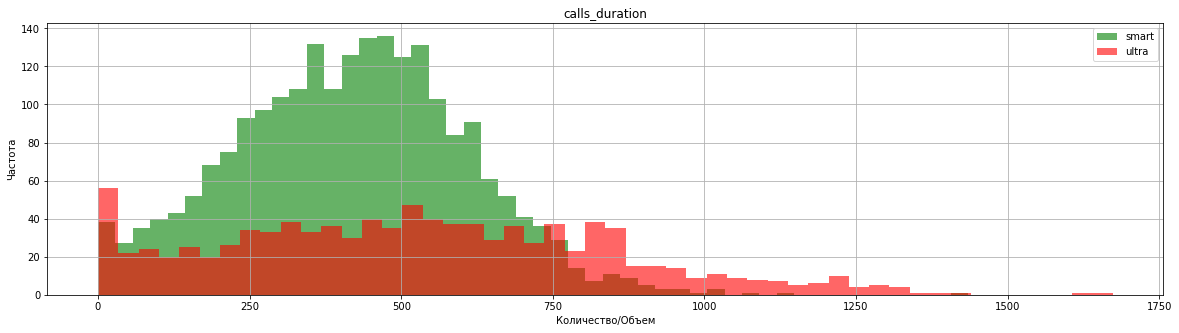

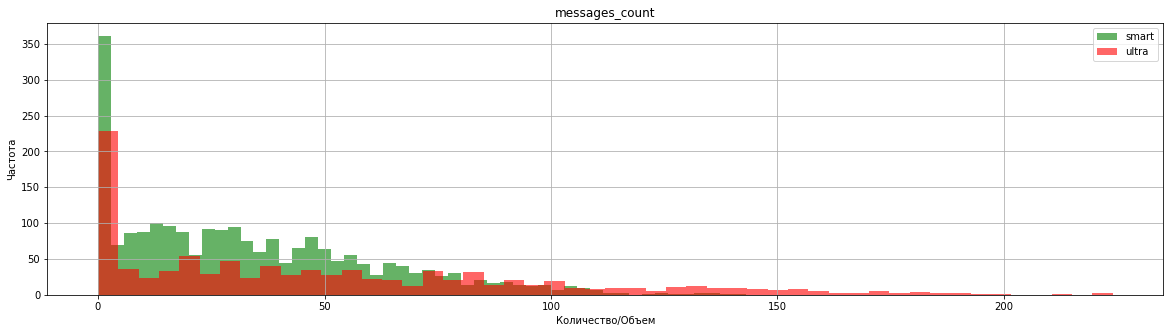

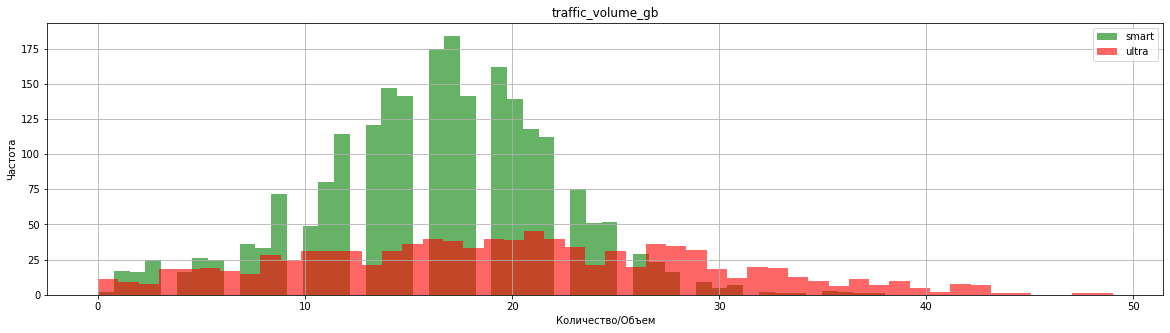

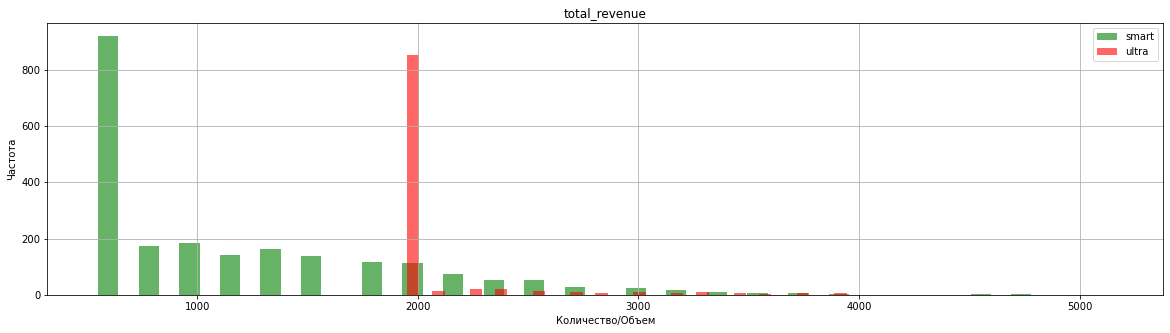

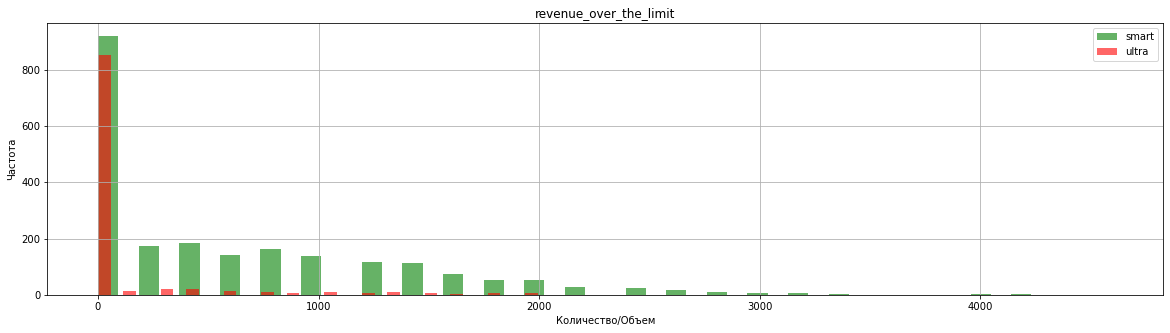

In [28]:
#создадим функцию для построения графиков
for col in ['calls_duration', 'messages_count', 'traffic_volume_gb', 'total_revenue','revenue_over_the_limit']:
    smart_tariff[col].plot.hist(alpha = 0.6 , color = 'green', title = col, grid = True, bins = 50,label='smart')
    ultra_tariff[col].plot.hist(alpha = 0.6, color = 'red', figsize = (20,5), grid = True, bins = 50,label='ultra')
    plt.legend()
    plt.xlabel("Количество/Объем")
    plt.ylabel("Частота")
    plt.show()

### Вывод.
Продолжительность звонков. По тарифу smart количество использованных минут, в основном варьируется от 300 до 600, пик приходится на 450/500 минут , в ultra - около 800 минут. Также в ultra есть небольшой пик на значениях от 0 до 50 минут.

Количество сообщений. По двум тарифам пик количества сообщений возле нуля, думаю это связано с тем, что люди пользуются в основном различными месенджерами.

Интернет.По двум тарифам пик пригодится на 20 ГБ.Большая дисперсия ultra объясняется меньшим объемом выборки, чем по тарифу smart.
Дисперсия по интернет трафику в тарифе ultra меньше, возможно клиенты выбирают этот тариф из-за большого пакета интернет-трафика. В современном мире большая часть звонков и сообщений осуществляются по интернету. Клиенты на тарифе ultra не экономят трафик,поэтому среднее с меньшим разбросом. Клиенты на тарифе smart к концу месяца получают неиспользованный трафик, который сгорает, а некоторые наоборот - перерасход.

Общая выручка. У smart пик приходится в районе 500,а у ultra около 2000. 

Выручка сверх лимита. Большое количество клиентов хоть немного, но перерасходует тарифные лимиты. По тарифу ultra большинство пользователей тратит до 2000, после чего есть еще одна граница в районе 4000, т.е. пользователя тарифа ультра в основном укладываются в лимиты тарифного плана и не перерасходуют его. Абонентам smart напротив не хватает пакета, предусмотренного тарифом. Они чаще переплачивают за дополнительные минуты и интернет-трафик.

## Проверка гипотез.

### Первая гипотеза:средняя выручка пользователей тарифов «Ультра» и «Смарт» различается,тогда.

H0-нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, а
H1 - альтернативная гипотеза- средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.
Пороговое значение 5%.

In [29]:
alpha = 0.05

results = st.ttest_ind(smart_tariff['total_revenue'], ultra_tariff['total_revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.80239123989675e-249
Отвергаем нулевую гипотезу


### Вывод.
p-уровень ниже порогового значения. Значит средняя выручка от тарифов различается.

### Вторая гипотеза-средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [30]:
moscow_revenue = user_consumption.query("city == 'Москва'")['total_revenue']
area_revenue = user_consumption.query("city != 'Москва'")['total_revenue']

alpha = 0.05

results = st.ttest_ind(moscow_revenue, area_revenue,equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.21050070696644343
Не получилось отвергнуть нулевую гипотезу


### Вывод.
Cредняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

## Вывод.

Для проведения исследования в некоторых столбцах изменили тип данных и округлили израсходаванные смс,звонки и трафик, также перевели значение в гигабайты, согласно документации. Рассмотрели данные по каждому пользователю и рассчитали:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

Также рассчитали среднее количество, дисперсию и стандартное отклонение исследуемых показателей.

Клиенты с тарифом smart тратят больше на дополнительные минуты,сообщения и интернет-трафик, но абоненты тарифа ultra более выгодны, так как их выручка больше, при этом клиенты не выходят за рамки пакета.

Коммерческому департаменту можно передать следующую информацию:
рекламный бюджет лучше перераспределить в пользу тарифа ultra, т.к. средняя выручка тарифов значимо различается. Абоненты тарифа ultra платят больше.

Проверка гипотез показала, что средняя выручка пользователей разных тарифов разная, а так же средняя выручка абонентов по Москве равна выручке пользователей из других регионов. 